In [1]:
# Import Library
import numpy as np                    # for computing operations of numeric data types
import matplotlib.pyplot as plt       # to create graphic visualizations
import pandas as pd                   # for data manipulation and analysis
import seaborn as sns                 # for statistical visualization
import random                         # to generate random float numbers
import statistics                     # as an analytical tool

from collections import Counter       # container datatypes
import string

import warnings
warnings.filterwarnings("ignore")

# **Calculator (1 Program)**
Create a function that randomly generates and returns a tuple of two or more positive integers. Use that function’s result in your script to prompt the user with a math question (such as: “How much is 6 times 7?”). Varying the computer’s responses can help hold the student’s attention. Prepare various comments which are displayed for each answer. Possible responses to a correct answer should include 'Very good!', 'Nice work!' and 'Keep up the good work!' Possible responses to an incorrect answer should include 'No. Please try again.', 'Wrong. Try once more.' and 'No. Keep trying.' Allow the user to pick a type of arithmetic problem to study e.g., 1 means addition problems only, 2 means subtraction problems only, 3 means multiplication problems only, 4 means 2 division problems only avoid dividing by 0) and 5 means a random mixture of all these types. Collect data regarding number of exercises correct/incorrect and total exercises per topic.
Allow the program to present descriptive statistical information in words/numbers and charts about each student (per user) and all students (all users) using the program.

In [2]:
def generate_question(operation):
    # Generates math questions according to the selected operation
    num1 = random.randint(1, 10)
    num2 = random.randint(1, 10)
    if operation == 'addition':
        question = f"How much is {num1} plus {num2} ? "
        answer = num1 + num2
    elif operation == 'subtraction':
        question = f"How much is {num1} minus {num2} ? "
        answer = num1 - num2
    elif operation == 'multiplication':
        question = f"How much is {num1} times {num2} ? "
        answer = num1 * num2
    elif operation == 'division':
        question = f"How much is {num1} divided by {num2} ? (Round to nearest whole number)"
        answer = num1 // num2
    return question, answer

def check_answer(user_answer, correct_answer):
    # Checking user answers and providing feedback
    if user_answer == correct_answer:
        feedback = random.choice(['Very good!', 'Nice work!', 'Keep up the good work!'])
        return True, feedback
    else:
        feedback = random.choice(['No. Please try again.', 'Wrong. Try once more.', 'No. Keep trying.'])
        return False, feedback

In [3]:
def get_problem_type():
    print("\nSELECT THE TYPE OF ARITHMETIC PROBLEM TO STUDY")
    print("1. Addition")
    print("2. Subtraction")
    print("3. Multiplication")
    print("4. Division")
    print("5. Random mixture")
    return int(input("Enter the number of your choice : "))

def main():
    total_exercises = 0
    correct_exercises = 0

    while True:
        problem_type = get_problem_type()
        if problem_type == 5:
            problem_type = random.randint(1, 4)

        operations = ['addition', 'subtraction', 'multiplication', 'division']
        selected_operation = operations[problem_type - 1]

        question, correct_answer = generate_question(selected_operation)
        print("\nQuestion : ", question)
        user_answer = int(input("Your answer : "))
        total_exercises += 1

        is_correct, feedback = check_answer(user_answer, correct_answer)
        if is_correct:
            correct_exercises += 1

        print("Feedback:", feedback)

        cont = input("\nDo you want to solve another problem ? (yes/no) : ").lower()
        if cont != 'yes':
            break

    print("\nSUMMARY OF YOUR PERFORMANCE")
    print(f"Total Exercises : {total_exercises}")
    print(f"Correct Exercises : {correct_exercises}")
    print(f"Incorrect Exercises : {total_exercises - correct_exercises}")

if __name__ == "__main__":
    main()


SELECT THE TYPE OF ARITHMETIC PROBLEM TO STUDY
1. Addition
2. Subtraction
3. Multiplication
4. Division
5. Random mixture
Enter the number of your choice : 5

Question :  How much is 5 minus 1 ? 
Your answer : 4
Feedback: Nice work!

Do you want to solve another problem ? (yes/no) : yes

SELECT THE TYPE OF ARITHMETIC PROBLEM TO STUDY
1. Addition
2. Subtraction
3. Multiplication
4. Division
5. Random mixture
Enter the number of your choice : 5

Question :  How much is 10 minus 6 ? 
Your answer : 5
Feedback: No. Keep trying.

Do you want to solve another problem ? (yes/no) : yes

SELECT THE TYPE OF ARITHMETIC PROBLEM TO STUDY
1. Addition
2. Subtraction
3. Multiplication
4. Division
5. Random mixture
Enter the number of your choice : 2

Question :  How much is 6 minus 7 ? 
Your answer : -1
Feedback: Nice work!

Do you want to solve another problem ? (yes/no) : no

SUMMARY OF YOUR PERFORMANCE
Total Exercises : 3
Correct Exercises : 2
Incorrect Exercises : 1


# **String (2 program)**
Allow student to insert one arbitrary string. Save the letters of the string into a list. Design and perform the following tasks and display your results:
-	Summarizing letters in a string. Write a function that receives a string and returns a list of tuples containing the unique letters and their frequencies in the string. Test your function and display each letter with its frequency. Your function should ignore case sensitivity (that is, 'a' and 'A' are the same) and ignore spaces and punctuation. When done, write a statement that says whether the string has all the letters of the alphabet.
-	Present descriptive statistics and graphs about the string data.
-	Sorting letters in different order and removing duplicates
-	Write a code that produces anagrams of a given string.

An anagram of a string is another string formed by rearranging the letters in the first.

In [4]:
# Formula to Calculate the frequency of each unique letter in a given string
def summarize_letters(input_string):
    # Converts the string to lowercase, removing punctuation and spaces
    cleaned_string = ''.join(char.lower() for char in input_string if char.isalpha())
    # Count the frequency of each letter
    letter_counts = {}
    for char in cleaned_string:
        if char in letter_counts:
            letter_counts[char] += 1
        else:
            letter_counts[char] = 1
    # Converts the result to a list of tuples
    summary = list(letter_counts.items())
    return summary

# Formula to Checks if the string contains all the letters in the alphabet
def contains_all_alphabets(input_string):
    # Set of all letters in the alphabet
    all_alphabets = set('abcdefghijklmnopqrstuvwxyz')
    # The set of letters in the input string
    input_characters = set(char.lower() for char in input_string if char.isalpha())
    # Checks whether the input_characters set contains all the letters in all_alphabets
    return all_alphabets.issubset(input_characters)

In [5]:
# Formula to Displays the frequency of each letter to the screen.
def display_letter_frequencies(summary):
    print("\nLetter Frequencies : ")
    for letter, frequency in summary:
        print(f"{letter}: {frequency}")

# Formula to Makes graphic
def plot_letter_frequencies(summary):
    letters, frequencies = zip(*summary)
    plt.figure(figsize=(10, 6))
    plt.bar(letters, frequencies)
    plt.xlabel('Letters')
    plt.ylabel('Frequencies')
    plt.title('Letter Frequencies')
    plt.show()

# Formula for Descriptive Statistics
def display_statistics(frequencies):
    mean = statistics.mean(frequencies)
    median = statistics.median(frequencies)
    try:
        mode = statistics.mode(frequencies)
    except statistics.StatisticsError:
        mode = "No unique mode"

    print("\nStatistical Summary")
    print(f"Mean frequency : {mean:.2f}")
    print(f"Median frequency : {median:.2f}")
    print(f"Mode frequency : {mode}" if isinstance(mode, str) else f"Mode frequency: {mode:.2f}")

In [6]:
# Formula to Sort letters in a string either alphabetically or by frequency
def sort_letters(input_string):
    # Eliminate duplicates and sort letters alphabetically
    cleaned_string = ''.join(sorted(set(input_string.lower())))
    # Sort letters by frequency
    letter_counts = {}
    for char in input_string.lower():
        if char.isalpha():
            if char in letter_counts:
                letter_counts[char] += 1
            else:
                letter_counts[char] = 1
    sorted_by_freq = ''.join(sorted(set(input_string.lower()), key = lambda x: letter_counts.get(x, 0), reverse = True))

    return cleaned_string, sorted_by_freq

In [7]:
# Formula for Generating anagrams
def generate_anagrams(input_string):
    cleaned_string = ''.join(char.lower() for char in input_string if char.isalpha())
    # Recursive function to generate anagrams
    def anagrams_recursive(s):
        if len(s) <= 1:
            return {s}
        else:
            anagrams = set()
            for i, char in enumerate(s):
                for perm in anagrams_recursive(s[:i] + s[i+1:]):
                    anagrams.add(char + perm)
            return anagrams

    anagrams = anagrams_recursive(cleaned_string)
    return anagrams

Enter the string : Hello World !!! 1234

Summary of letters and their frequencies :  [('h', 1), ('e', 1), ('l', 3), ('o', 2), ('w', 1), ('r', 1), ('d', 1)]
The string does not contain all letters of the alphabet

Letter Frequencies : 
h: 1
e: 1
l: 3
o: 2
w: 1
r: 1
d: 1


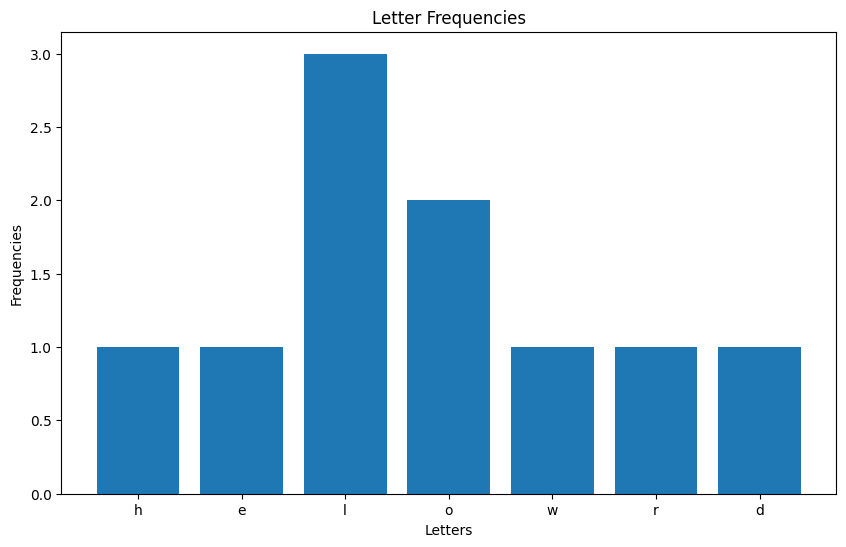


Statistical Summary
Mean frequency : 1.43
Median frequency : 1.00
Mode frequency: 1.00

Letters sorted alphabetically :   !1234dehlorw
Letters sorted by frequency :  lohwrde3!1 42


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
# Example of calling a function and printing the result
input_string = input("Enter the string : ")
summary = summarize_letters(input_string)
print("\nSummary of letters and their frequencies : ", summary)

if contains_all_alphabets(input_string):
    print("The string contains all letters of the alphabet")
else:
    print("The string does not contain all letters of the alphabet")

display_letter_frequencies(summary)
plot_letter_frequencies(summary)

# Extract frequencies for statistical analysis
_, frequencies = zip(*summary)
display_statistics(frequencies)

sorted_abjad, sorted_freq = sort_letters(input_string)
print("\nLetters sorted alphabetically : ", sorted_abjad)
print("Letters sorted by frequency : ", sorted_freq)

anagrams = generate_anagrams(input_string)
print(f"Anagrams of '{input_string}' : ", anagrams)

# **Survey (3 program)**
-	Ask your student to rate on a scale of 1 to 5 the quality of 20 products in a store, with 1 being “awful” and 5 being “excellent”. Place the 20 responses in a list. 1, 2, 5, 4, 3, 5, 2, 1, 3, 3, 1, 4, 3, 3, 3, 2, 3, 3, 2, 5.
-	Determine and display the frequency of each rating. Use the built-in functions, statistics module functions and NumPy functions to display the following response statistics: minimum, maximum, range, mean, median, mode, variance, and standard deviation.
-	Display a bar chart showing the response frequencies and their percentages of the total responses.

In [12]:
# Users does the input
responses = []
print("Please Enter Ratings (1-5) for 20 Products : ")

while len(responses) < 20:
    try:
        rating = int(input(f"Product rates {len(responses) + 1}: "))
        if 1 <= rating <= 5:23
            responses.append(rating)
        else:
            print("Please enter a number between 1 and 5 only.")
    except ValueError:
        print("You must enter a valid number.")

# Determine the frequency of each assessment
frequencies = {i: responses.count(i) for i in range(1, 6)}

Please Enter Ratings (1-5) for 20 Products : 
Product rates 1: 1
Product rates 2: 
You must enter a valid number.
Product rates 2: 2
Product rates 3: 5
Product rates 4: 4
Product rates 5: 3
Product rates 6: 5
Product rates 7: 2
Product rates 8: 1
Product rates 9: 3
Product rates 10: 3
Product rates 11: 1
Product rates 12: 4
Product rates 13: 3
Product rates 14: 3
Product rates 15: 3
Product rates 16: 2
Product rates 17: 3
Product rates 18: 3
Product rates 19: 2
Product rates 20: 5


In [13]:
# Statistical Calculation Formula
minimum = min(responses)
maximum = max(responses)
range_value = maximum - minimum
mean = statistics.mean(responses)
median = statistics.median(responses)
mode = statistics.mode(responses)
variance = statistics.variance(responses)
std_dev = statistics.stdev(responses)

# Show the Results
print("FREQUENCY OF EACH RATING")
for rating, freq in frequencies.items():
    print(f"Rating {rating}: {freq}")

print("\nSTATISTICAL SUMMARY")
print(f"Minimum : {minimum}")
print(f"Maximum : {maximum}")
print(f"Range : {range_value}")
print(f"Mean : {mean:.2f}")
print(f"Median : {median:.2f}")
print(f"Mode : {mode}")
print(f"Variance : {variance:.2f}")
print(f"Standard Deviation : {std_dev:.2f}")

FREQUENCY OF EACH RATING
Rating 1: 3
Rating 2: 4
Rating 3: 8
Rating 4: 2
Rating 5: 3

STATISTICAL SUMMARY
Minimum : 1
Maximum : 5
Range : 4
Mean : 2.90
Median : 3.00
Mode : 3
Variance : 1.57
Standard Deviation : 1.25


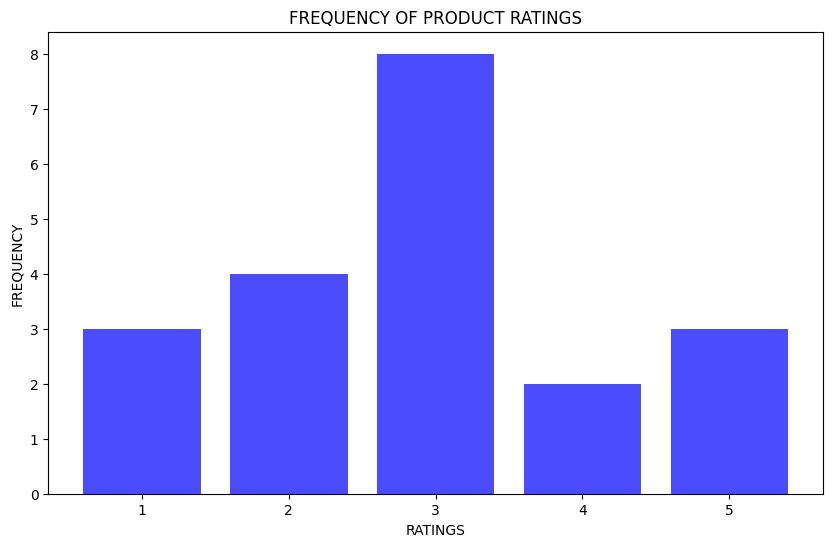

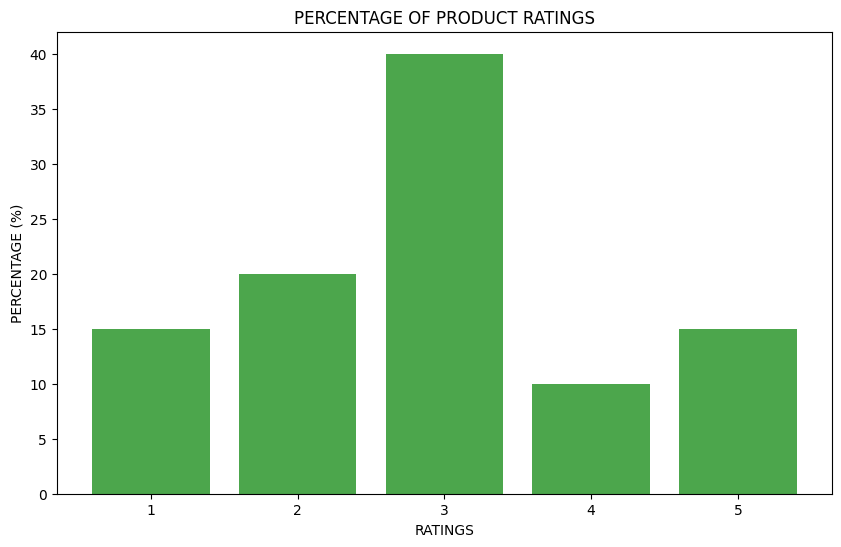

In [14]:
# Determine the percentage of each assessment
total_responses = len(responses)
percentages = {rating: (freq / total_responses) * 100 for rating, freq in frequencies.items()}

# Displays a frequency bar graph
plt.figure(figsize = (10, 6))
plt.bar(frequencies.keys(), frequencies.values(), color = 'blue', alpha = 0.7)
plt.xlabel('RATINGS')
plt.ylabel('FREQUENCY')
plt.title('FREQUENCY OF PRODUCT RATINGS')
plt.show()

# Displays a percentage bar graph
plt.figure(figsize=(10, 6))
plt.bar(percentages.keys(), percentages.values(), color = 'green', alpha = 0.7)
plt.xlabel('RATINGS')
plt.ylabel('PERCENTAGE (%)')
plt.title('PERCENTAGE OF PRODUCT RATINGS')
plt.show()

# **Game (2 program + arcade manager or single mix game)**
-	Each member of the group to develop a game based on words or numbers and including descriptive statistics. Combine the best of the group member solutions and create an arcade or single own mix of other games amazing and fun game, which offer other student to either rest or develop their brain skills through play. You can use a List (or another data structure we have covered) to be the environment for your world.

## **Game 1: Guess the Number**
Guess the Numbers is a game that puts your sharp intuition and luck to the test by having you guess numbers that the computer randomly chooses. This is a simple game in which players are asked to guess numbers randomly chosen by the computer within a specific range. This game was created using the concept of generating random numbers and accepting user input. Using a descriptive statistics approach, the programme can track each player's number of correct and incorrect guesses in order to provide success statistics.

In [15]:
print("A simple game in which the player must guess a randomly generated number.")

def guess_the_number():
    print("Welcome to Guess the Number!")
    number = random.randint(1, 100)
    attempts = 0
    while True:
        guess = int(input("Guess a number between 1 and 100 : "))
        attempts += 1
        if guess < number:
            print("TOO LOW !!! Try again ...")
        elif guess > number:
            print("TOO HIGH !!! Try again ...")
        else:
            print(f"CONGRATULATIONS !!! You guessed the number in {attempts} attempts.")
            break

# Call the game function
guess_the_number()

A simple game in which the player must guess a randomly generated number.
Welcome to Guess the Number!
Guess a number between 1 and 100 : 50
TOO LOW !!! Try again ...
Guess a number between 1 and 100 : 75
TOO HIGH !!! Try again ...
Guess a number between 1 and 100 : 60
TOO HIGH !!! Try again ...
Guess a number between 1 and 100 : 55
TOO HIGH !!! Try again ...
Guess a number between 1 and 100 : 52
TOO HIGH !!! Try again ...
Guess a number between 1 and 100 : 51
CONGRATULATIONS !!! You guessed the number in 6 attempts.


## **Game 2: Rock, Paper, Scissors**
Rock, Paper, Scissors is a classic game that provides the simple pleasure of making decisions and defeating your opponent. The player will choose one of three options: rock, paper, or scissors, and his opponent will do the same. This programme was created with simple logic to determine the winner based on the choices made by both players. Using a descriptive statistical approach, the programme can determine the number of wins, losses, and draws for each player.

In [16]:
def rock_paper_scissors():
    print("Welcome to Rock, Paper, Scissors!")
    choices = ['rock', 'paper', 'scissors']
    user_choice = input("Enter your choice (rock, paper, or scissors) : ").lower()
    computer_choice = random.choice(choices)
    print(f"The computer chose : {computer_choice}")
    if user_choice == computer_choice:
        print("It's a tie!")
    elif (user_choice == 'rock' and computer_choice == 'scissors') or \
         (user_choice == 'paper' and computer_choice == 'rock') or \
         (user_choice == 'scissors' and computer_choice == 'paper'):
        print("CONGRATULATIONS !!! YOU WIN !!! :)")
    else:
        print("Sorry! You lose! :(")

# Call the game function
rock_paper_scissors()

Welcome to Rock, Paper, Scissors!
Enter your choice (rock, paper, or scissors) : paper
The computer chose : paper
It's a tie!
